In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## **Cleaning up the data**  

In [24]:
def outputCheck(df):
    if(df.columns.size >0):
        print("■■■■■ Pass■■■■■")           
    else:
        print("Error the dataframe is empty or null")

In [25]:
df =pd.read_csv("data/new_fire_weather_data.csv")

outputCheck(df)

■■■■■ Pass■■■■■


In [26]:
#df.to_csv("fire_weather_data.csv",index=False)
nand=[]
for i in range(len(df)-1,-1,-1):
    for ele in df.iloc[i]:
        if str(ele)== "nan":
            df=df.drop(df.index[i])
            break


In [27]:
#dont need after first run
df.to_csv("data/new_fire_weather_data.csv")

In [28]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

## **Creating a linear model**

In [29]:
outputCheck(df)
df =df[df.incident_acres_burned>100]
df =df[ df.incident_acres_burned <200000]
df

■■■■■ Pass■■■■■


,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,incident_name,incident_date_created,incident_administrative_unit,incident_county,incident_location,incident_acres_burned,incident_cooperating_agencies,...,Max Temperature,Avg Temperature,Min Temperature,Dew Point,Precipitation,Snowdepth,Wind,Gust Wind,Sea Level Pressure,elevation
2,2,2,4,Gold Fire,2013-04-30 12:59:00,CAL FIRE Madera-Mariposa-Merced Unit,Madera,Between Road 210 and Road 200 near Fine Gold C...,274,CAL FIRE Madera-Mariposa-Merced Unit,...,92.00,77.98,63.29,40.10,0.00,0.0,6.08,0.60,29.51,484.616089
4,4,4,7,Yellow Fire,2013-05-01 02:01:00,CAL FIRE Sonoma-Lake-Napa Unit,Sonoma,Hwy 128 & Yellow Jacket Ranch Rd in Knights Va...,125,CAL FIRE Sonoma-Lake-Napa Unit,...,88.71,65.77,47.00,39.54,0.00,0.0,5.01,2.21,29.72,255.670990
5,5,5,8,Summit Fire,2013-05-01 12:38:00,CAL FIRE/Riverside County Fire,Riverside,Mias Canyon and Bluff Road in Banning,3166,CAL FIRE/Riverside County Fire,...,87.14,75.65,55.29,35.28,0.00,0.0,5.59,1.54,28.67,2411.368408
6,6,6,9,Tres Pinos Fire,2013-05-03 11:42:00,CAL FIRE San Benito-Monterey,San Benito,"Highway 25 and Horizon Rd, Community of Tres",354,CAL FIRE San Benito-Monterey,...,85.14,69.29,55.71,41.68,0.00,0.0,6.71,1.42,29.84,24.833916
7,7,7,10,306 Fire,2013-05-01 19:00:00,CAL FIRE Tehama-Glenn Unit,Glenn,2 miles south of the community of Elk Creek,217,CAL FIRE Tehama-Glenn Unit,...,87.00,73.86,60.86,27.52,0.00,0.0,11.47,9.79,29.41,526.162109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1259,1259,1259,1646,Creek Fire,2020-08-18 17:58:52,CAL FIRE Mendocino Unit,Mendocino,"Covelo, Highway 162 and Short Creek Rd",820,Cooperating Agencies: California Department of...,...,98.14,83.60,59.29,51.48,0.01,0.0,4.58,0.00,29.11,418.601074
1260,1260,1260,1648,Moc Fire,2020-08-20 14:26:08,CAL FIRE Tuolumne-Calaveras Unit and Central C...,Tuolumne,"Hwy 49 and Hwy 120, Moccasin",2857,CAL FIRE Tuolumne-Calaveras Unit,...,102.57,87.41,73.14,55.08,0.00,0.0,8.25,1.08,29.80,293.668060
1261,1261,1261,1651,Sheep Fire,2020-08-22 22:02:57,"Unified Command: Plumas National Forest, Lasse...",Plumas,"Gold Run Road, Southwest of Susanville in Plum...",29570,Plumas National Forest,...,98.14,83.60,59.29,51.48,0.01,0.0,4.58,0.00,29.11,1614.909912
1263,1263,1263,1659,Oak Fire,2020-09-07 13:26:45,CAL FIRE MEU Mendocino Unit,Mendocino,West of Highway 101--Big John Road & Skyview R...,1100,"CAL FIRE Mendocino Unit , Cooperating Agencies...",...,87.29,67.07,55.14,51.73,0.00,0.0,2.73,0.51,29.72,588.767822


In [30]:
size=99
state =45
train_fire_x,test_fire_x,train_fire_target,test_fire_target=train_test_split(df.drop(columns=["Unnamed: 0","incident_latitude","incident_longitude","incident_date_created","incident_name","incident_administrative_unit","incident_county","incident_location","incident_cooperating_agencies","incident_acres_burned","incident_date_extinguished","incident_dateonly_extinguished","incident_dateonly_created","Precipitation","Snowdepth","Sea Level Pressure"]), df['incident_acres_burned'], test_size=1-size/100,random_state=state)
outputCheck(train_fire_x)
outputCheck(test_fire_x)
test_fire_x
test_fire_target


■■■■■ Pass■■■■■
■■■■■ Pass■■■■■


827      300
442      225
113      163
1157    8838
612      135
7        217
89      8073
Name: incident_acres_burned, dtype: int64

In [31]:
regression_line =linear_model.LinearRegression()
regression_line.fit(train_fire_x,train_fire_target)

predictions =regression_line.predict(test_fire_x)

In [32]:
tft=[y for y in test_fire_target]
for i in range(len(tft)):
    print(f'Prediction:{predictions[i]}--Answer:{tft[i]}')




Prediction:300.00000000000125--Answer:300
Prediction:225.00000000000324--Answer:225
Prediction:163.00000000000432--Answer:163
Prediction:8837.999999999996--Answer:8838
Prediction:135.00000000000247--Answer:135
Prediction:217.00000000000443--Answer:217
Prediction:8072.999999999998--Answer:8073


In [1]:
print(mean_squared_error(tft,predictions))
print(r2_score(tft,predictions))


NameError: name 'mean_squared_error' is not defined

In [34]:
import matplotlib.pyplot as plt
#i need to create comparisons between all the vars


## **Comparing the variables and the Outputs**

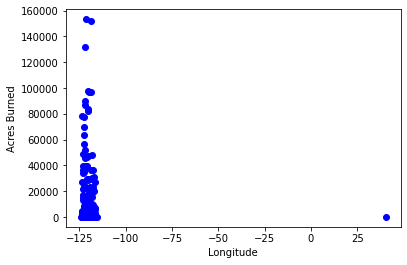

In [35]:
#most longitude and lats are very similar and not enough data to have accurate data for area in the specific coords
arr=df.incident_longitude
ans=df.incident_acres_burned
#plotting it
plt.scatter(arr,ans,color='Blue')
#lables
plt.xlabel("Longitude")
plt.ylabel("Acres Burned")


plt.show()

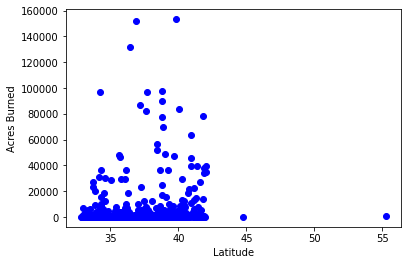

In [36]:
arr=df.incident_latitude
ans=df.incident_acres_burned
#plotting it
plt.scatter(arr,ans,color='Blue')
#lables
plt.xlabel("Latitude")
plt.ylabel("Acres Burned")


plt.show()

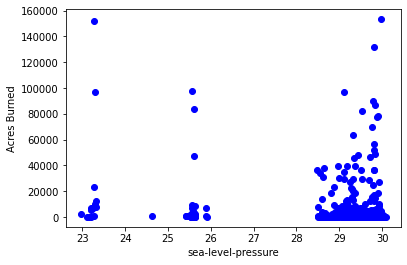

In [37]:
arr=df["Sea Level Pressure"]
ans=df.incident_acres_burned
#plotting it
plt.scatter(arr,ans,color='Blue')
#lables
plt.xlabel("sea-level-pressure")
plt.ylabel("Acres Burned")


plt.show()

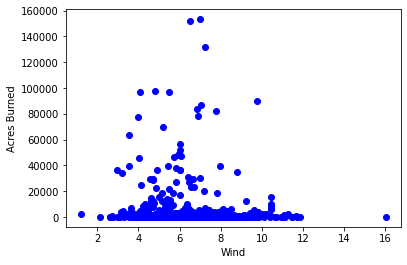

In [38]:
arr=df["Wind"]
ans=df.incident_acres_burned
#plotting it
plt.scatter(arr,ans,color='Blue')
#lables
plt.xlabel("Wind")
plt.ylabel("Acres Burned")


plt.show()

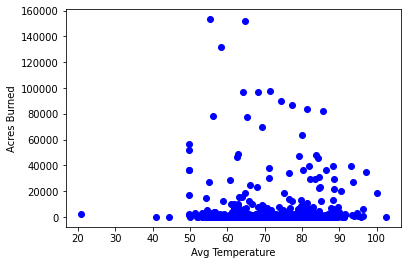

In [39]:
arr=df["Avg Temperature"]
ans=df.incident_acres_burned
#plotting it
plt.scatter(arr,ans,color='Blue')
#lables
plt.xlabel("Avg Temperature")
plt.ylabel("Acres Burned")


plt.show()

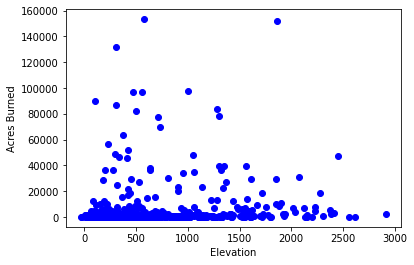

In [40]:
arr=df.elevation
ans=df.incident_acres_burned
#plotting it
plt.scatter(arr,ans,color='Blue')
#lables
plt.xlabel("Elevation")
plt.ylabel("Acres Burned")


plt.show()
#fires usually do not grow to large sizes at higher elevations
#most fires occured below 1500 meters
#more info on how topography and altitude and day cycle affect fires is below
# https://www.fs.fed.us/rm/pubs_exp_for/priest_river/exp_for_priest_river_1942_hayes02.pdf


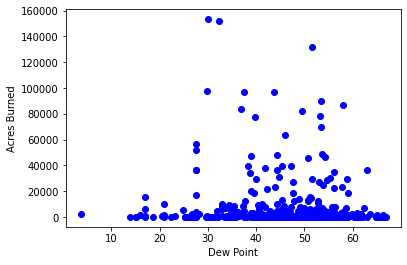

In [41]:
arr=df["Dew Point"]
ans=df.incident_acres_burned
#plotting it
plt.scatter(arr,ans,color='Blue')
#lables
plt.xlabel("Dew Point")
plt.ylabel("Acres Burned")


plt.show()
#Dew Point is the atmospheric pressure that it takes for water drops to condense and form
#dew point has an effect on the rate of fires because lowers can cause lower moistures in
#fuels at the bottom of a forrest
# https://www.dfes.wa.gov.au/waemergencyandriskmanagement/obrm/Documents/Relative-Humidity-and-Dew-Point-Information-Sheet.pdf
#this does not exactly agree with my results it seems that between 60-30 most fires occur
#the temperature also must be affected by air temperature and below 30ish its too cold for fires

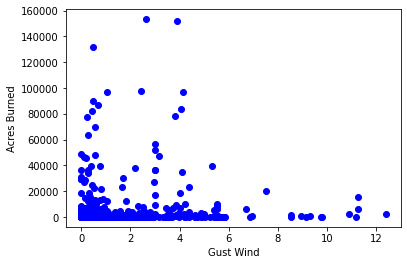

In [42]:
arr=df["Gust Wind"]
ans=df.incident_acres_burned
#plotting it
plt.scatter(arr,ans,color='Blue')
#lables
plt.xlabel("Gust Wind")
plt.ylabel("Acres Burned")


plt.show()
#there is a consistent outlier of the thomas fire which occured in the winter time, but 
#gree to be one of the largest fires in  cali becasue of other codnitions
#this fire has low dew point  and high winds
# more info can be found below on the wiki  
#  https://en.wikipedia.org/wiki/Thomas_Fire

In [43]:
#graph of average fire size
totalAcres=0
average_fire=[]
dates=[]
print(df.sort_values(by="incident_date_created").size)
for i in range(df.sort_values(by="incident_date_created").size):
    if i ==0:
        continue
    if(i ==1265):
        break

    totalAcres+=df.sort_values(by="incident_date_created").iloc[i].incident_acres_burned
    average_fire.append(totalAcres/i)
    dates.append(df.sort_values(by="incident_date_created").iloc[i].incident_dateonly_created)
average_fire[0].pop()
dates[0].pop()


15350


IndexError: single positional indexer is out-of-bounds

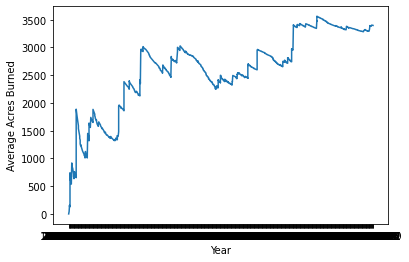

In [ ]:
plt.plot(dates, average_fire)

plt.xlabel("Year")
plt.ylabel("Average Acres Burned")


plt.show()
#This a plot of the average fire size over the years which could mean that date is an important factor to fire size